In [4]:
words = open('../names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
t = {} # for trigram counts; curly brackets are used for dictionaries

for w in words:
    with_breaks = ['<S>'] + list(w) + ['</E>']
    for ch1, ch2, ch3 in zip(with_breaks, with_breaks[1:], with_breaks[2:]):
        trigram = (ch1, ch2, ch3)
        t[trigram] = t.get(trigram, 0) + 1 # if found, add to count for the key in the dict

In [6]:
sorted(t.items(), key=lambda kv: kv[1], reverse=True) # sort by value (count

[(('a', 'h', '</E>'), 1714),
 (('n', 'a', '</E>'), 1673),
 (('a', 'n', '</E>'), 1509),
 (('o', 'n', '</E>'), 1503),
 (('<S>', 'm', 'a'), 1453),
 (('<S>', 'j', 'a'), 1255),
 (('<S>', 'k', 'a'), 1254),
 (('e', 'n', '</E>'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '</E>'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '</E>'), 903),
 (('i', 'e', '</E>'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '</E>'), 766),
 (('e', 'l', '</E>'), 727),
 (('y', 'a', '</E>'), 716),
 (('a', 'n', 'i'), 703),
 (('<S>', 'd', 'a'), 700),
 (('l', 'a', '</E>'), 684),
 (('e', 'r', '</E>'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('<S>', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('<S>', 'a', 'l'), 632),
 (('<S>', 'c', 'a'), 628),
 (('r', 'a', '</E>'), 627),
 (('n', 'i', '</E>'), 625),
 (('<S>', 'a', 'n'), 623),
 (('n', 'n', '</E>'), 619),
 (('n', 'e', '</E>'), 607),
 (('e', 'e', '</E>'), 605

In [7]:
import torch

In [8]:
tens = torch.zeros(27,27,27) # for the 27 unique characters
tens

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [9]:
chars = sorted(list(set(''.join(words)))) # get the unique characters
stoi = {s:i +1 for i,s in enumerate(chars)} # string to index
stoi['.'] = 0 # end character

itos = {i:s for s,i in stoi.items()} # index to string
itos


{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [10]:

# This implements a count for each trigram stored in the tensor, like the first example, but stores it in a tensor vs adding to dict

for w in words:
    with_breaks = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(with_breaks, with_breaks[1:], with_breaks[2:]):
        index_one = stoi[ch1]
        index_two = stoi[ch2]
        index_three = stoi[ch3] # getting index for each character for tensor

        tens[index_one, index_two, index_three] += 1 # add one to the tensor

In [11]:
tens

tensor([[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0., 207., 190.,  ...,  27., 173., 152.],
         [  0., 169.,   0.,  ...,   0.,   4.,   0.],
         ...,
         [  0.,  57.,   0.,  ...,   1.,  17.,  11.],
         [  0., 246.,   0.,  ...,   0.,   0.,   2.],
         [  0., 456.,   0.,  ...,   0.,  91.,   1.]],

        [[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [ 40.,   0.,   5.,  ...,   0.,  20.,  11.],
         [ 36.,  28.,  20.,  ...,   0.,  12.,   0.],
         ...,
         [ 11.,   5.,   0.,  ...,  17.,   6.,   3.],
         [163., 389.,  13.,  ...,   0.,  16.,  40.],
         [ 38., 123.,   0.,  ...,   0.,  12.,  22.]],

        [[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [ 46.,   5.,   5.,  ...,   4.,  31.,   4.],
         [  1.,   8.,   0.,  ...,   0.,   9.,   0.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [ 55.,   4.,   1.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

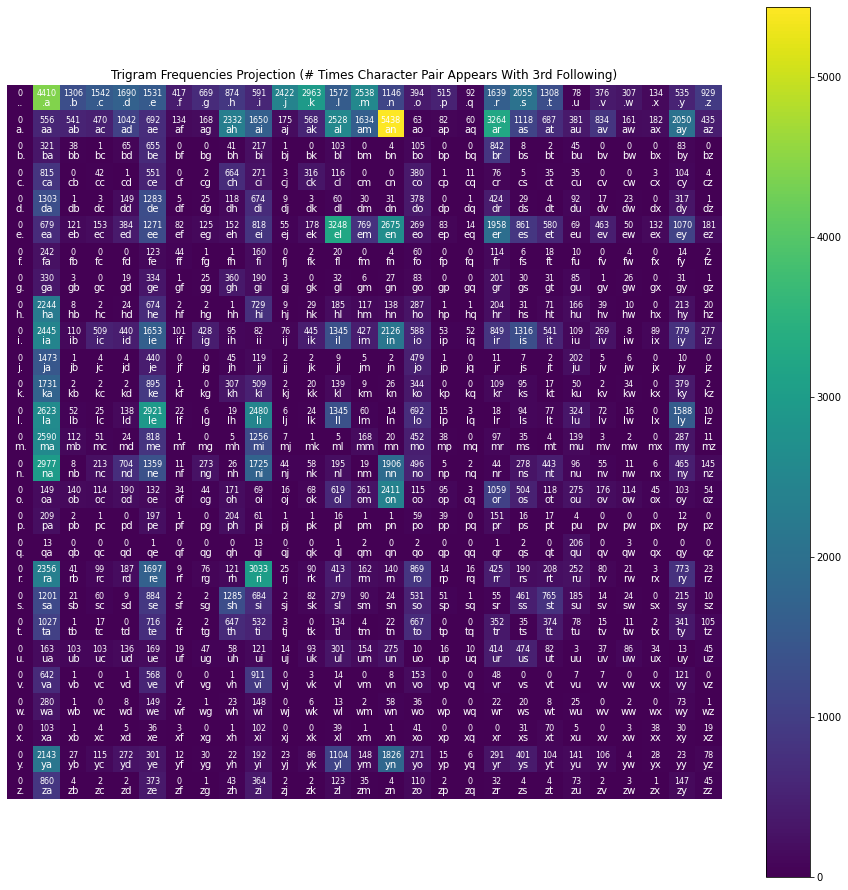

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

# We'll create a 2D projection of the tensor by summing along one axis
# This reduces the tensor to a 2D matrix where each element represents the sum of trigrams for a pair of characters
projection = tens.sum(axis=2)

# Plotting the projection matrix
plt.imshow(projection, cmap='viridis')

# Optionally, annotate each cell with the sum (if it's significant)
for i in range(27):
    for j in range(27):
        val = projection[i, j].item()
        charstr = itos[i] + itos[j]
        plt.text(j, i, charstr, ha="center", va="top", color='white')
        plt.text(j, i, f'{int(val)}', fontsize=8, ha='center', va='bottom', color='white')

plt.title('Trigram Frequencies Projection (# Times Character Pair Appears With 3rd Following)')
plt.axis('Off')
plt.colorbar()
plt.show()


In [13]:
tens[2, 5, :] # get the raw counts for the trigram starting with 'be'

tensor([ 25.,  23.,   1.,  21.,   8.,  16.,   0.,   1.,   7.,   4.,   0.,  13.,
        201.,   4.,  84.,   2.,   0.,   0., 152.,   8.,  61.,   1.,   3.,   0.,
          8.,   8.,   4.])

In [14]:
tens[2, 5].sum() # get the total count for the trigram starting with 'be'

tensor(655.)

In [15]:
chars = [itos[i] for i in range(len(itos))]
chars


['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

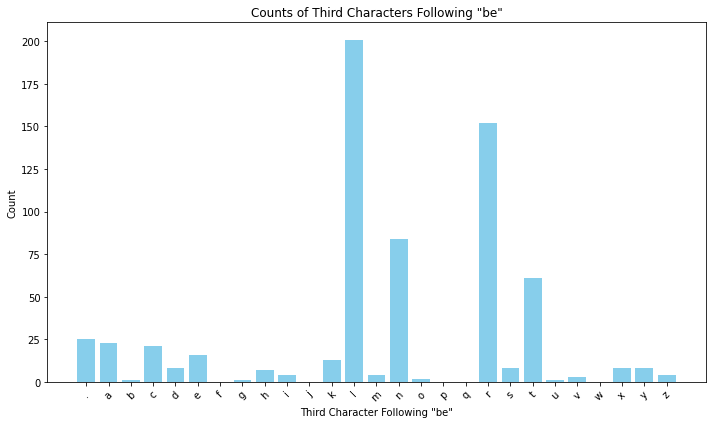

In [16]:
import matplotlib.pyplot as plt

# Assuming 'stoi' and 'itos' are properly defined and include all necessary characters
# Extracting the slice for 'be' directly for counts
be_slice = tens[stoi['b'], stoi['e'], :]

# Characters for x-axis labels, making sure to include all characters that could follow "be"
chars = [itos[i] for i in range(len(itos))]

plt.figure(figsize=(10, 6))
plt.bar(chars, be_slice.numpy(), color='skyblue')  # Convert tensor slice to numpy array for plotting

plt.xlabel('Third Character Following "be"')
plt.ylabel('Count')
plt.title('Counts of Third Characters Following "be"')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()


In [17]:
# Now we're going to make a probability distribution -- which will, for each third character in the trigram, get its likelihood
# ie. # of times that specific char of all possibilities shows up / total possibilities

be_trigrams = tens[2, 5, :]

# tensor([25 / 655, 23 / 655, 1 / 655 ...]) and so forth
probability = be_trigrams / be_trigrams.sum()
probability

# here, the probabilities all summed should be one

tensor([0.0382, 0.0351, 0.0015, 0.0321, 0.0122, 0.0244, 0.0000, 0.0015, 0.0107,
        0.0061, 0.0000, 0.0198, 0.3069, 0.0061, 0.1282, 0.0031, 0.0000, 0.0000,
        0.2321, 0.0122, 0.0931, 0.0015, 0.0046, 0.0000, 0.0122, 0.0122, 0.0061])

In [18]:
# Now we can sample from this distribution to get a random character, ie. generate based on these probabilities
# So here, based on using multinomial to sample from the probabilities of the trigrams based on the 'be' pair,
# We are getting 'bel' -- this makes sense, as we can see from the bar chart that 'l' is the most common character to follow 'be'

g = torch.Generator().manual_seed(2147483647)
index = torch.multinomial(probability, num_samples=1, replacement=True, generator=g).item()
itos[index]

'l'

In [19]:
# Okay, now let's not just generate one random character based on the probabilities, but a whole name

for i in range(20): # generate 20 names
    index_i = 0 # storing the previous character
    index_j = 1 # storing the newly generated character

    tens[index_i, index_j, :]
    out = []

    while True:
        trigram = tens[index_i, index_j, :]
        totals = tens[index_i, index_j, :].sum() 
        if totals == 0:
            continue
        probability = trigram / totals # get the probability distribution -- considered trained model, not everything is equally likely. Even if just counts / total
        index_i = index_j
        index_j = torch.multinomial(probability, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[index_j])
        if index_j == 0:
            break
    print(''.join(out))


unide.
ilyasid.
urelay.
adin.
von.
rltoper.
maree.
viahnia.
vinileniassibiainewin.
lessiyanayla.
re.
undeumarif.
d.
urj.
n.
nn.
lena.
mani.
rose.
ya.


In [42]:
# Add a count of one to everything to 'smooth out' the model, so that we don't have any zero probabilities
# If that happens loss goes to infinity

tens = tens + 1

In [45]:
# Now I want to evaluate how good this counting model is
# The product of all of these probabilities is the 'likelihood' of the model -- product should be very high
# We'll use the log likelihood, as likelihoods are often very small and hard to work with
# The engative of this is also known as the loss.

log_likelihood = 0.0
n = 0

for w in words:
    with_breaks = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(with_breaks, with_breaks[1:], with_breaks[2:]):
        index_one = stoi[ch1]
        index_two = stoi[ch2]
        index_three = stoi[ch3] # getting index for each character for tensor

        trigram = tens[index_one, index_two, index_three]
        totals = tens[index_one, index_two, :].sum()
        prob = trigram / totals

        # get the log likelihood, ie loss
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

        # print(f'{ch1}{ch2}{ch3}: {prob:.4f} {logprob:.4f}')
        # in a good model these probabilities should near one (good at predicting)

# Now we can calculate the log likelihood for the entire dataset
# log(a*b*c) = log(a) + log(b) + log(c), so we just added logprob above
log_likelihood = -log_likelihood # loss
print(f'{log_likelihood=}')

# The loss here is less, already, than in the bigram model!
# Instead of just counting, people also like to normalize, so we'll take the logprob and divide by the number of terms
# Thus the normalized loss is 2.0927 over the entire dataset
print(f'{log_likelihood/n=}')

log_likelihood=tensor(410414.9688)
log_likelihood/n=tensor(2.0927)


In [86]:
# Now let's start with an alternative model
# Instead of counting to get probabilities and then sampling, we'll use a neural network to predict the next character
# In other words, we'll use gradient based optimization to learn the probabilities and tune weights

# We'll start by creating a training set of all of the trigrams, same as we did before
xs, ys, zs = [], [], []

for w in words[:1]:
    with_breaks = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(with_breaks, with_breaks[1:], with_breaks[2:]):
        index_one = stoi[ch1]
        index_two = stoi[ch2]
        index_three = stoi[ch3] # getting index for each character for tensor

        # tens[index_one, index_two, index_three] += 1 # this is counting
        xs.append(index_one) # this is the training set for the neural network
        ys.append(index_two)
        zs.append(index_three)

xs = torch.tensor(xs) # convert to tensor
ys = torch.tensor(ys)
zs = torch.tensor(zs)


In [87]:
xs

tensor([ 0,  5, 13, 13])

In [92]:
# We have a training set now. Now we need to feet it into a neural net
# Right now the tensors just contain integers of the indices of the characters
# You can't feed integers directly into a neural net; neurons have weights which multiply x bias, etc.
# So we need to convert these integers into one-hot vectors
# Basically it'll create a vector all zeroes, but flipped to 1 at the index of the character

import torch.nn.functional as F

# I'll have two input layers, xs, and ys 
xenc = F.one_hot(xs, num_classes=27).float() # convert to one-hot vectors
yenc = F.one_hot(ys, num_classes=27).float()

# I'll now combine them to create a combined input tensor
combined = torch.cat([xenc, yenc], dim=1) # first 27 dimensions (ie elements in array) are xenc, and the next are yenc
combined.shape

# four rows, each of which are examples into a neural net. Each of the 4 inputs has 54 features

torch.Size([4, 54])

In [113]:
# Now let's test creating 60 neurons for the hidden layer -- this is W + b, but we don't have bias for now
# We might want more neurons to capture more of the complexity, but using too many can also lead
# To overfitting. 

W1 = torch.randn((54, 60)) # Random weights, which will be adjusted by the optimizer soon

# dot product, (4, 54) @ (54, 60). Gives the firing rate of the 60 W1 neuron on all 4 inputs in parallel
logits = combined @ W1 

#We'll exponentiate this, to get rid of negatives.
# This is equivalent conceptually to the 'tens' array where we got the raw counts
# The probabilities are the normalized counts (like before where we got a count / total counts of all possibilities)
# These two lines are called the 'softmax activation function'
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs 

# This gives the final neural net probability of a character appearing, which we'll tune with the loss function
# ie. tuning the weights to reduce loss

tensor([[2.4499e-03, 3.2575e-03, 4.8091e-04, 5.6268e-03, 3.6004e-03, 7.7415e-03,
         2.3506e-03, 3.3878e-02, 1.6262e-02, 3.3551e-04, 1.1491e-02, 4.1129e-02,
         3.6522e-03, 6.2103e-02, 3.3664e-03, 6.7571e-03, 2.1895e-02, 2.3694e-02,
         1.5000e-02, 1.8685e-03, 2.8921e-03, 8.9091e-03, 3.2266e-02, 9.4184e-03,
         3.8001e-03, 3.8898e-02, 8.8754e-03, 2.3992e-03, 5.1555e-02, 8.7928e-04,
         6.7387e-03, 7.2370e-02, 5.9431e-02, 5.7214e-03, 1.1021e-02, 3.8386e-03,
         4.1336e-02, 8.7465e-03, 1.8943e-03, 2.1119e-02, 2.1826e-01, 1.4774e-02,
         1.4274e-02, 6.1055e-03, 2.3105e-03, 4.1421e-03, 1.2584e-03, 2.7030e-03,
         1.7387e-03, 8.0914e-03, 2.7618e-03, 5.9683e-03, 2.1228e-02, 1.5085e-02,
         1.0753e-03, 8.4045e-03, 1.5996e-03, 7.3294e-04, 5.6535e-03, 4.7838e-03],
        [1.1359e-03, 6.0249e-03, 2.6522e-03, 2.4567e-01, 3.9093e-04, 2.9000e-03,
         4.7022e-02, 5.1993e-02, 1.5228e-02, 1.5087e-03, 1.7051e-03, 9.6457e-03,
         3.4986e-03, 1.0740

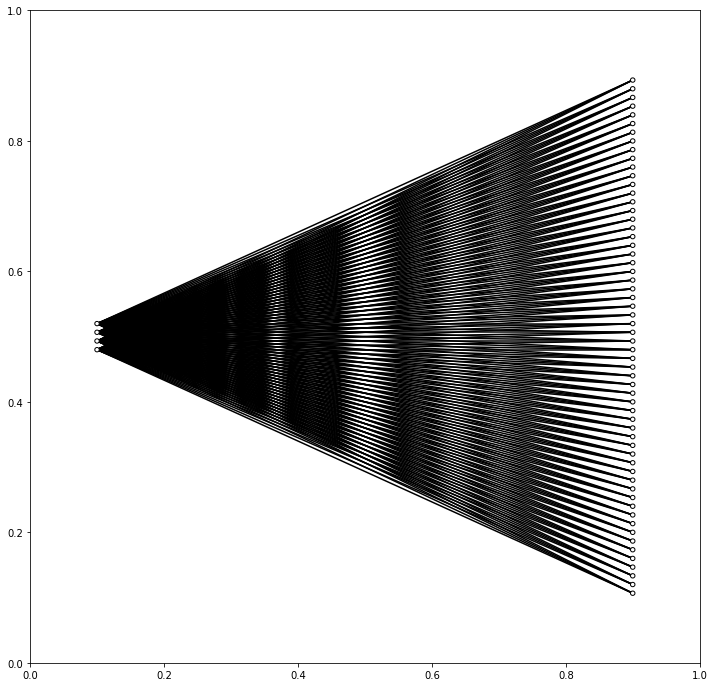

In [107]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
draw_neural_net(ax, .1, .9, .1, .9, [4, 60])